In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import OrdinalEncoder
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from pickle import dump, load

/Users/iaquine/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#visualizando os dados
df = pd.read_excel('/Users/iaquine/Documents/PI3/dados pi3.xlsx')
df.head(10)

,Tipo de Personalidade,Disciplina favorita,Disciplina você não gostava,Graduação,Grau de satisfacao,Segunda graduação,Grau de satisfacao segunda graduacao
0,ENFJ-A ou ENFJ-T (Protagonista),Português,Física,Administração,4,Sim,5
1,ESTP-A ou ESTP-T (Empresário),Física,Matemática,Bacharelado em Tecnologia da Informação,5,Não,0
2,INFJ-A ou INFJ-T (Advogado),Português,Física,Bacharelado em Tecnologia da Informação,5,Sim,5
3,ISFJ-A ou ISFJ-T (Defensor),Biologia,Química,Bacharelado em Tecnologia da Informação,5,Não,0
4,ISFJ-A ou ISFJ-T (Defensor),Geografia,Sociologia,Bacharelado em Tecnologia da Informação,3,Não,0
5,ISTP-A ou ISTP-T (Virtuoso),Matemática,Filosofia,Bacharelado em Tecnologia da Informação,5,Sim,4
6,ENFP-A ou ENFP-T (Ativista),Artes,Física,Biotecnologia,1,Sim,5
7,INTJ-A ou INTJ-T (Arquiteto),Português,Educação Física,Ciência da Computação,2,Sim,5
8,ENFJ-A ou ENFJ-T (Protagonista),Artes,Física,"Comunicação Visual, Assistente de Administraçã...",5,Não,0
9,ESFJ-A ou ESFJ-T (Cônsul),História,Português,Contabilidade,5,Não,0


In [3]:
df.shape

(44, 7)

In [4]:
df.dtypes

Tipo de Personalidade                   object
Disciplina favorita                     object
Disciplina você não gostava             object
Graduação                               object
Grau de satisfacao                       int64
Segunda graduação                       object
Grau de satisfacao segunda graduacao     int64
dtype: object

In [5]:
df['Tipo de Personalidade'] = df['Tipo de Personalidade'].map({'ENFJ-A ou ENFJ-T (Protagonista)':0, 'ENFP-A ou ENFP-T (Ativista)':1, 'ENTJ-A ou ENTJ-T (Comandante)':2, 'ENTP-A ou ENTP-T (Inovador)':3, 'ESFJ-A ou ESFJ-T (Cônsul)':4, 'ESFP-A ou ESFP-T (Animador)':5, 'ESTP-A ou ESTP-T (Empresário)':6, 'INFJ-A ou INFJ-T (Advogado)':7, 'INFP-A ou INFP-T (Mediador)':8, 'INTJ-A ou INTJ-T (Arquiteto)':9, 'INTP-A ou INTP-T (Lógico)':10, 'ISFJ-A ou ISFJ-T (Defensor)':11, 'ISTJ-A ou ISTJ-T (Logístico)':12, 'ISTP-A ou ISTP-T (Virtuoso)':13})

In [6]:
df['Tipo de Personalidade'].value_counts()

11    7
0     5
6     5
4     4
1     3
9     3
10    3
5     3
7     2
13    2
2     2
3     2
12    2
8     1
Name: Tipo de Personalidade, dtype: int64

In [7]:
df.head()

,Tipo de Personalidade,Disciplina favorita,Disciplina você não gostava,Graduação,Grau de satisfacao,Segunda graduação,Grau de satisfacao segunda graduacao
0,0,Português,Física,Administração,4,Sim,5
1,6,Física,Matemática,Bacharelado em Tecnologia da Informação,5,Não,0
2,7,Português,Física,Bacharelado em Tecnologia da Informação,5,Sim,5
3,11,Biologia,Química,Bacharelado em Tecnologia da Informação,5,Não,0
4,11,Geografia,Sociologia,Bacharelado em Tecnologia da Informação,3,Não,0


In [8]:
df['Disciplina favorita'].value_counts()

Matemática                                      15
Português                                        6
Artes                                            5
Física                                           3
Biologia                                         3
Geografia                                        3
História                                         3
Língua estrangeira (ex. Inglês ou Espanhol )     2
Geometria                                        1
Computação                                       1
Química                                          1
Educação Física                                  1
Name: Disciplina favorita, dtype: int64

In [9]:
df['Disciplina favorita'] = df['Disciplina favorita'].map({'Matemática':0, 'Português':1, 'Artes':2, 'Física':3, 'Geografia':4, 'História':5, 'Biologia':6, 'Língua estrangeira (ex. Inglês ou Espanhol )':7, 'Química':8, 'Computação':9, 'Geometria':10, 'Educação Física':11})

In [10]:
df['Disciplina favorita'].value_counts()

0     15
1      6
2      5
3      3
6      3
4      3
5      3
7      2
10     1
9      1
8      1
11     1
Name: Disciplina favorita, dtype: int64

In [11]:
df['Disciplina você não gostava'].value_counts()

Física             10
Química             8
Português           7
Matemática          6
Filosofia           3
Geografia           3
Sociologia          2
Biologia            2
História            2
Educação Física     1
Name: Disciplina você não gostava, dtype: int64

In [12]:
df['Disciplina você não gostava'] = df['Disciplina você não gostava'].map({'Física':0, 'Química':1, 'Português':2, 'Matemática':3, 'Filosofia':4, 'Geografia':5, 'Biologia':6, 'Sociologia':7, 'História':8, 'Educação Física':9})

In [13]:
df['Disciplina você não gostava'].value_counts()

0    10
1     8
2     7
3     6
4     3
5     3
7     2
6     2
8     2
9     1
Name: Disciplina você não gostava, dtype: int64

In [14]:
df.head()

,Tipo de Personalidade,Disciplina favorita,Disciplina você não gostava,Graduação,Grau de satisfacao,Segunda graduação,Grau de satisfacao segunda graduacao
0,0,1,0,Administração,4,Sim,5
1,6,3,3,Bacharelado em Tecnologia da Informação,5,Não,0
2,7,1,0,Bacharelado em Tecnologia da Informação,5,Sim,5
3,11,6,1,Bacharelado em Tecnologia da Informação,5,Não,0
4,11,4,7,Bacharelado em Tecnologia da Informação,3,Não,0


In [15]:
df['Graduação'].value_counts()

Pedagogia                                                                    7
Bacharelado em Tecnologia da Informação                                      7
Engenharia de Computação                                                     5
Nutrição                                                                     2
Enfermagem                                                                   2
Engenharia de Software                                                       1
Medicina                                                                     1
Letras                                                                       1
Hardware                                                                     1
Gestão de Tecnologia da Informação                                           1
Gestão de RH                                                                 1
Gestão de recursos humanos                                                   1
Gastronomia                                         

In [16]:
#df['Graduação'] = df['Graduação'].map({'Tecnologia da informação':0, 'Programação':1, 'Design':2, 'Ciência da Computação':3, 'Biotecnologia':4, 'Administração':5, 'Letras':6, 'Educação Física':7, 'Gestão de Tecnologia da Informação':8, 'Farmacia':9, 'Gastronomia':10, 'Comunicação Visual, Assistente de Administração, Informática, web Design':11, 'Engenharia Civil':12, 'Direito':13, 'Medicina': 14, 'Engenharia da Computação':15, 'Bacharelado em Tecnologia da Informação':16, 'Pedagogia':17, 'Gestão de recursos humanos':18, 'Contabilidade':19, 'Engenharia':20, 'Hardware':21, 'Engenharia de Software':22, 'Economia':23, 'Gestão de RH':24, 'Engenharia de Computação':25, 'Enfermagem':26})
ord_enc = OrdinalEncoder()
df["Graduação_code"] = ord_enc.fit_transform(df[["Graduação"]])
df[["Graduação", "Graduação_code"]].head(11)

,Graduação,Graduação_code
0,Administração,0.0
1,Bacharelado em Tecnologia da Informação,1.0
2,Bacharelado em Tecnologia da Informação,1.0
3,Bacharelado em Tecnologia da Informação,1.0
4,Bacharelado em Tecnologia da Informação,1.0
5,Bacharelado em Tecnologia da Informação,1.0
6,Biotecnologia,2.0
7,Ciência da Computação,3.0
8,"Comunicação Visual, Assistente de Administraçã...",4.0
9,Contabilidade,5.0


In [17]:
df['Graduação_code'].value_counts()

24.0    7
1.0     7
13.0    5
23.0    2
10.0    2
14.0    1
22.0    1
21.0    1
20.0    1
18.0    1
17.0    1
19.0    1
16.0    1
15.0    1
0.0     1
12.0    1
11.0    1
9.0     1
8.0     1
7.0     1
6.0     1
5.0     1
4.0     1
3.0     1
2.0     1
25.0    1
Name: Graduação_code, dtype: int64

In [18]:
df.head()

,Tipo de Personalidade,Disciplina favorita,Disciplina você não gostava,Graduação,Grau de satisfacao,Segunda graduação,Grau de satisfacao segunda graduacao,Graduação_code
0,0,1,0,Administração,4,Sim,5,0.0
1,6,3,3,Bacharelado em Tecnologia da Informação,5,Não,0,1.0
2,7,1,0,Bacharelado em Tecnologia da Informação,5,Sim,5,1.0
3,11,6,1,Bacharelado em Tecnologia da Informação,5,Não,0,1.0
4,11,4,7,Bacharelado em Tecnologia da Informação,3,Não,0,1.0


In [19]:
df['Segunda graduação'] = df['Segunda graduação'].map({'Não':0, 'Sim':1})

In [20]:
df.head()

,Tipo de Personalidade,Disciplina favorita,Disciplina você não gostava,Graduação,Grau de satisfacao,Segunda graduação,Grau de satisfacao segunda graduacao,Graduação_code
0,0,1,0,Administração,4,1,5,0.0
1,6,3,3,Bacharelado em Tecnologia da Informação,5,0,0,1.0
2,7,1,0,Bacharelado em Tecnologia da Informação,5,1,5,1.0
3,11,6,1,Bacharelado em Tecnologia da Informação,5,0,0,1.0
4,11,4,7,Bacharelado em Tecnologia da Informação,3,0,0,1.0


In [21]:
#atributos_nomes = ['Tipo de Personalidade','Disciplina favorita','Disciplina você não gostava','Grau de satisfacao', 'Segunda graduação', 'Grau de satisfacao segunda graduacao']
atributos_nomes = ['Tipo de Personalidade','Disciplina favorita','Disciplina você não gostava']
atributos = df[atributos_nomes]

In [22]:
atributos[40:48]

,Tipo de Personalidade,Disciplina favorita,Disciplina você não gostava
40,6,6,3
41,5,3,5
42,10,0,2
43,0,0,2


In [23]:
classes = df['Graduação_code']

In [24]:
classes.head()

0    0.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: Graduação_code, dtype: float64

In [25]:
atributos.dtypes

Tipo de Personalidade          int64
Disciplina favorita            int64
Disciplina você não gostava    int64
dtype: object

In [26]:
#construindo o modelo
arvore = DecisionTreeClassifier()
arvore = arvore.fit(atributos, classes)

In [27]:
classes_names = ['Pedagogia','Bacharelado em Tecnologia da Informação','Engenharia de Computação', 'Nutrição', 'Enfermagem','Engenharia de Software','Medicina','Letras','Hardware','Gestão de Tecnologia da Informação','Gestão de RH','Gestão de recursos humanos','Gastronomia','Farmacia','Administração','Engenharia Civil','Engenharia','Educação Física','Economia','Direito','Design','Contabilidade','Comunicação Visual, Assistente de Administração, Informática, web Design','Ciência da Computação','Biotecnologia','Programação']                   

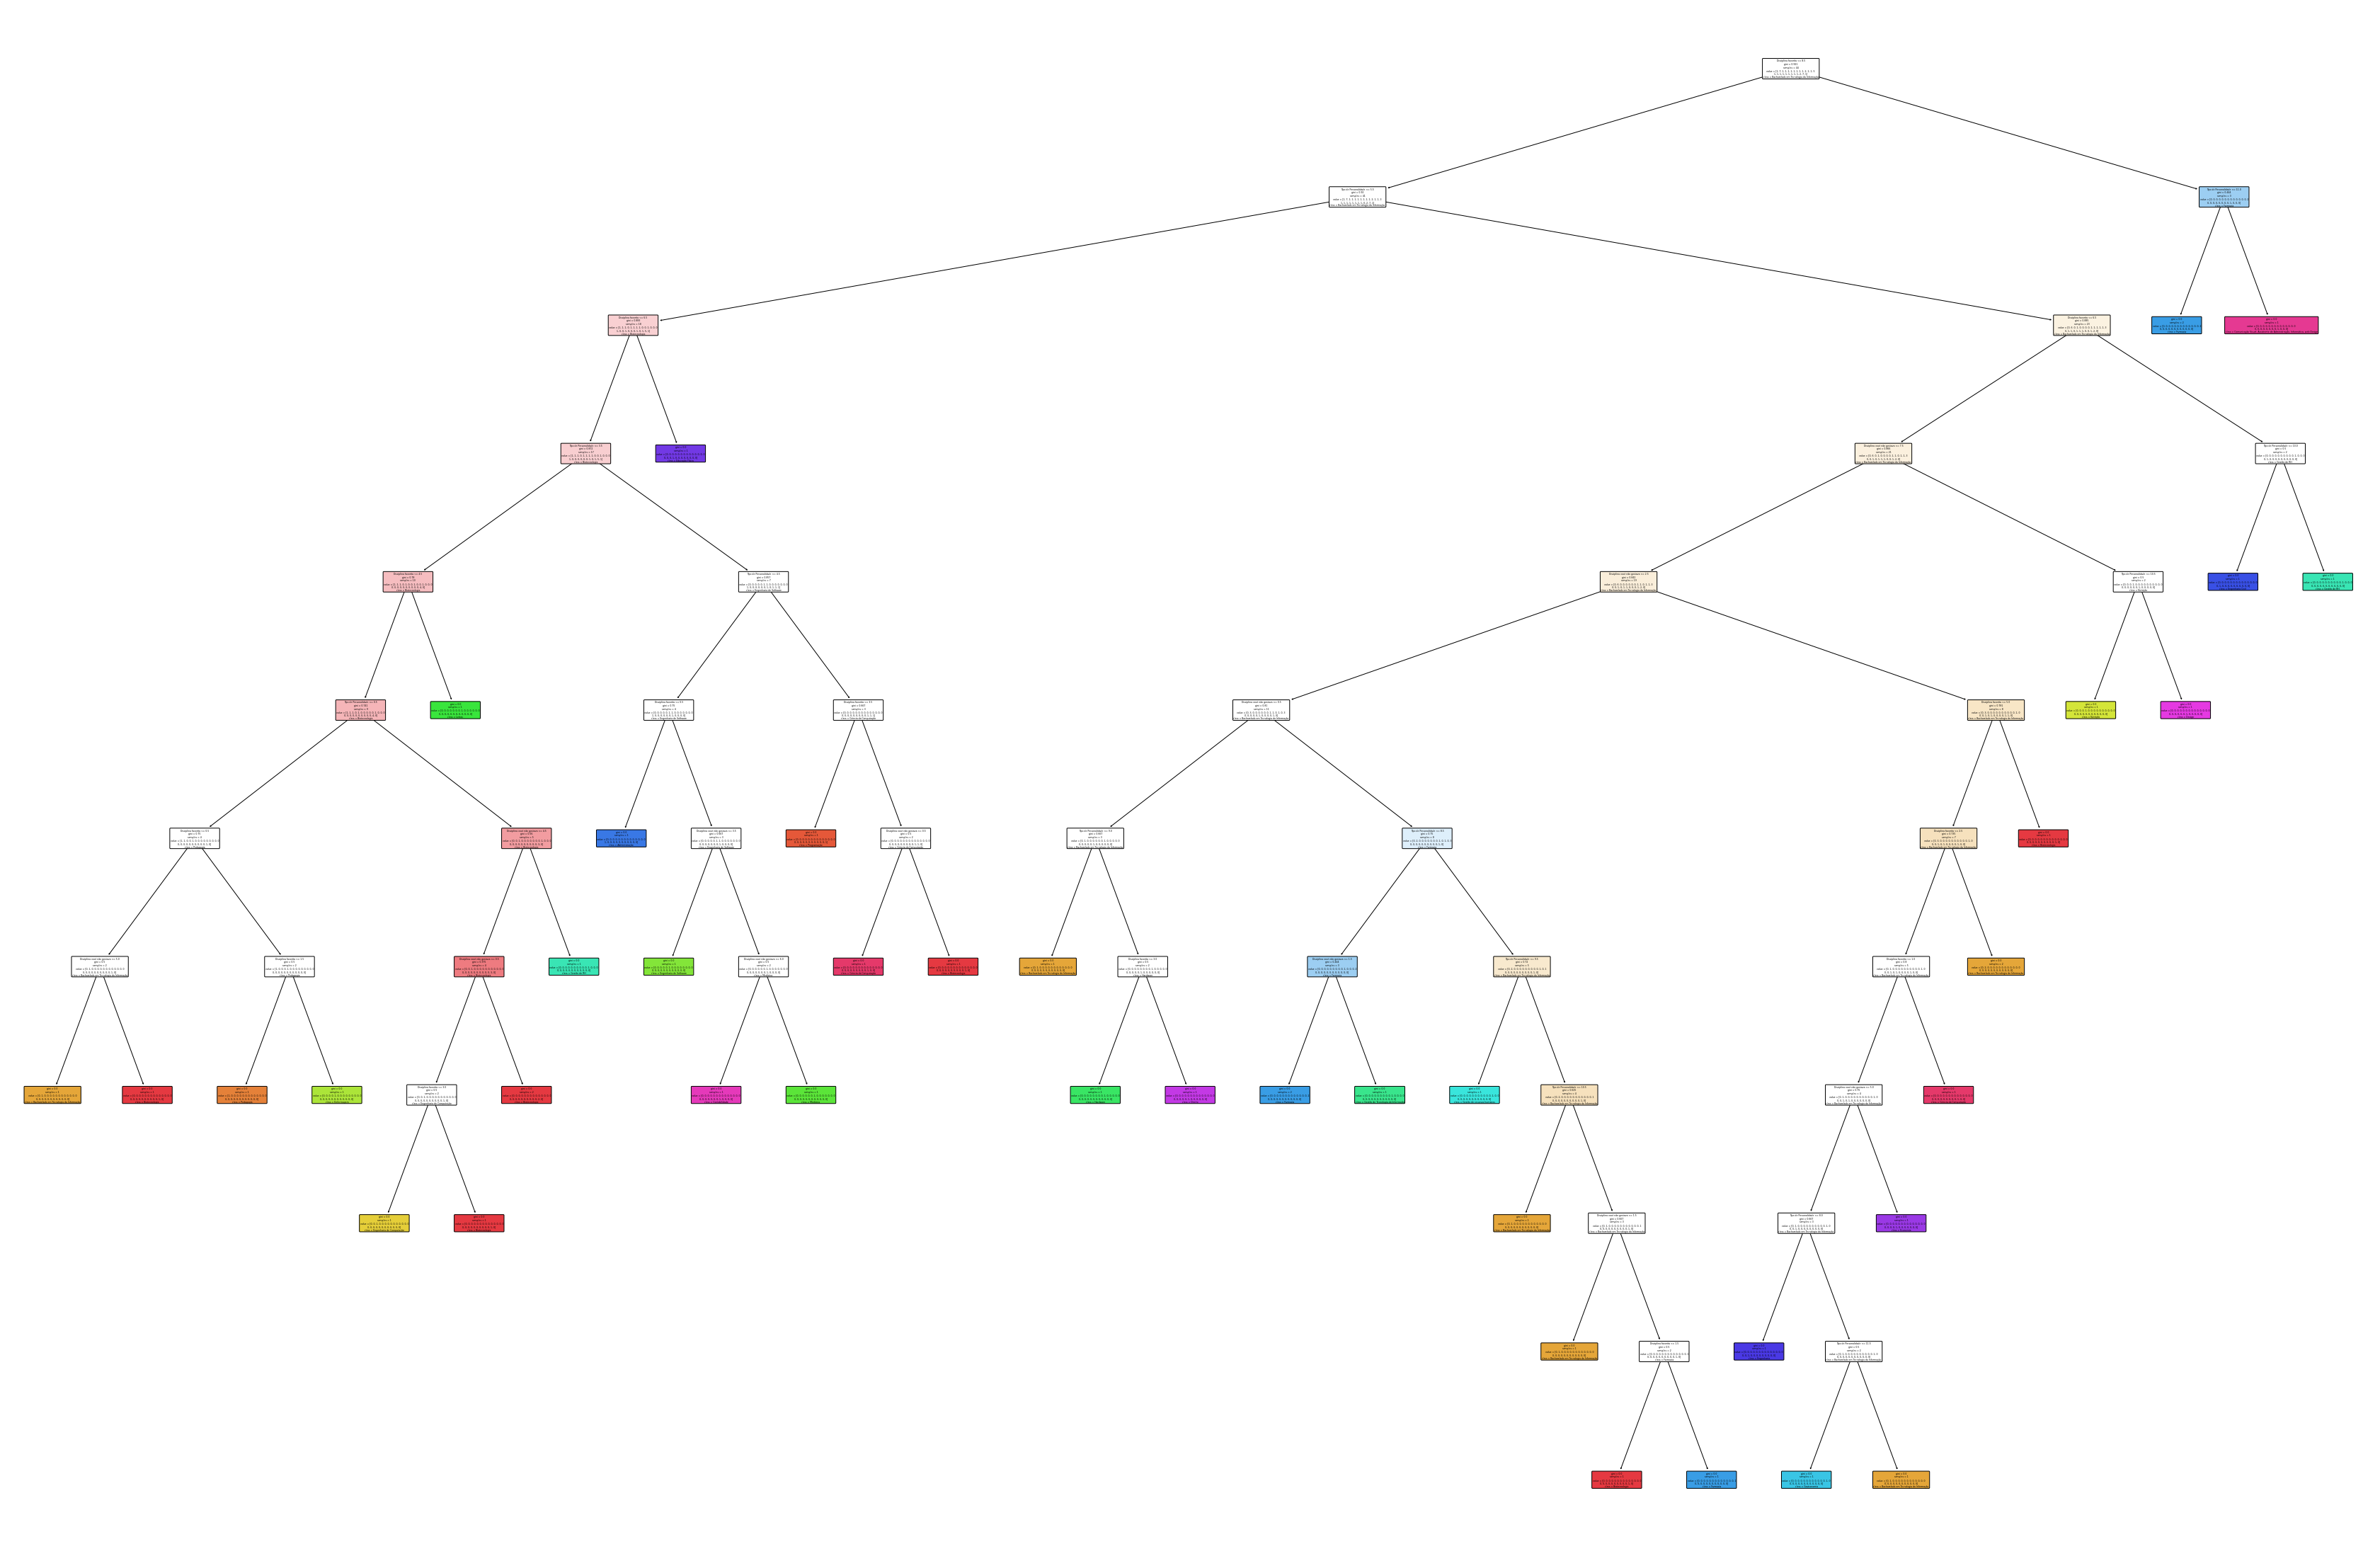

In [28]:
#visualizando a arvore que foi gerada
plt.figure(figsize=(60,40))
plot_tree(arvore,
          filled=True,
          rounded=True,
          class_names=classes_names,
          feature_names=atributos_nomes)
plt.savefig('arvore.png')
plt.show()

In [29]:
print(arvore.predict([[8,7,8]]))

[15.]


In [30]:
df[:30]

,Tipo de Personalidade,Disciplina favorita,Disciplina você não gostava,Graduação,Grau de satisfacao,Segunda graduação,Grau de satisfacao segunda graduacao,Graduação_code
0,0,1,0,Administração,4,1,5,0.0
1,6,3,3,Bacharelado em Tecnologia da Informação,5,0,0,1.0
2,7,1,0,Bacharelado em Tecnologia da Informação,5,1,5,1.0
3,11,6,1,Bacharelado em Tecnologia da Informação,5,0,0,1.0
4,11,4,7,Bacharelado em Tecnologia da Informação,3,0,0,1.0
5,13,0,4,Bacharelado em Tecnologia da Informação,5,1,4,1.0
6,1,2,0,Biotecnologia,1,1,5,2.0
7,9,1,9,Ciência da Computação,2,1,5,3.0
8,0,2,0,"Comunicação Visual, Assistente de Administraçã...",5,0,0,4.0
9,4,5,2,Contabilidade,5,0,0,5.0


In [31]:
df[["Graduação", "Graduação_code"]].head(44)

,Graduação,Graduação_code
0,Administração,0.0
1,Bacharelado em Tecnologia da Informação,1.0
2,Bacharelado em Tecnologia da Informação,1.0
3,Bacharelado em Tecnologia da Informação,1.0
4,Bacharelado em Tecnologia da Informação,1.0
5,Bacharelado em Tecnologia da Informação,1.0
6,Biotecnologia,2.0
7,Ciência da Computação,3.0
8,"Comunicação Visual, Assistente de Administraçã...",4.0
9,Contabilidade,5.0


In [32]:
#salvando o modelo
filename = 'arvore_model2.pkl'
dump(arvore, open(filename, 'wb'))

In [33]:
modelo = load(open(filename, 'rb'))
print(modelo.predict([[8,7,8]]))

[15.]


In [34]:
switcher = {0.0:'Administração', 1.0:'Bacharelado em Tecnologia da Informação', 2.0:'Biotecnologia', 3.0:'Ciência da Computação',4.0:'Comunicação Visual, Assistente de Administração, Informática, web Design ', 5.0:'Contabilidade',6.0:'Design',7.0:'Direito',8.0:'Economia',9.0:'Educação Física',10.0:'Enfermagem',11.0:'Engenharia',12.0:'Engenharia Civil',13.0:'Engenharia de Computação',14.0:'Engenharia de Software',15.0:'Farmacia',16.0:'Gastronomia',17.0:'Gestão de RH',18.0:'Gestão de Tecnologia da Informação',19.0:'Gestão de recursos humanos',20.0:'Hardware',21.0:'Letras',22.0:'Medicina',23.0:'Nutrição',24.0:'Pedagogia',25.0:'Programação'}

In [35]:
print(switcher.get(0.0))

Administração
